# Storytelling Case Study: Airbnb, NYC

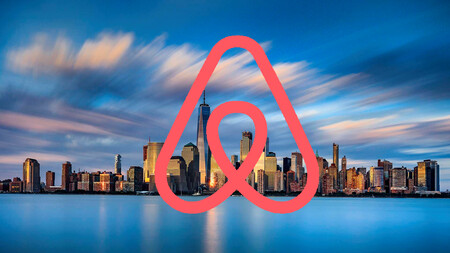

**Problem background**: 
Suppose that you are working as a data analyst at Airbnb. For the past few months, Airbnb has seen a major decline in revenue. Now that the restrictions have started lifting and people have started to travel more, Airbnb wants to make sure that it is fully prepared for this change.

 

The different leaders at Airbnb want to understand some important insights based on various attributes in the dataset so as to increase the revenue such as -

- Which type of hosts to acquire more and where?
- The categorisation of customers based on their preferences.
- What are the neighbourhoods they need to target?
- What is the pricing ranges preferred by customers?
- The various kinds of properties that exist w.r.t. customer preferences.
- Adjustments in the existing properties to make it more customer-oriented.
- What are the most popular localities and properties in New York currently?
- How to get unpopular properties more traction? and so on...


- *Note: These points are just to give you an initial understanding of how to proceed with the analysis and the kind of questions you need to ask. In addition to this, you would need to further understand the data (attached below in this page) and analyse important insights that you feel are required for the audiences mentioned for each of the two presentations.*

**End Objective**:

To prepare for the next best steps that Airbnb needs to take as a business, you have been asked to analyse a dataset consisting of various Airbnb listings in New York. Based on this analysis, you need to give two presentations to the following groups.

1. Presentation - I
 - Data Analysis Managers: These people manage the data analysts directly for processes and their technical expertise is basic.
 - Lead Data Analyst: The lead data analyst looks after the entire team of data and business analysts and is technically sound.

2. Presentation - II
 - Head of Acquisitions and Operations, NYC: This head looks after all the property and host acquisitions and operations. Acquisition of the best properties, price negotiation, and negotiating the services the properties offer falls under the purview of this role.
 - Head of User Experience, NYC: The head of user experience looks after the customer preferences and also handles the properties listed on the website and the Airbnb app. Basically, the head of user experience tries to optimise the order of property listing in certain neighbourhoods and cities in order to get every property the optimal amount of traction.

#### Import Liabraries

In [1]:
# Import Liabraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')

**Data Dictionary**:

This dataset contains information about different Airbnb listings along with their hosts, locations, prices and other attributes.

In [2]:
Data_Dictionary = pd.read_excel('Data_Dictionary.xlsx')
Data_Dictionary

,Column,Description
0,id,listing ID
1,name,name of the listing
2,host_id,host ID
3,host_name,name of the host
4,neighbourhood_group,location
5,neighbourhood,area
6,latitude,latitude coordinates
7,longitude,longitude coordinates
8,room_type,listing space type
9,price,price


#### Variables into different types:

You can classify the variables into different types – categorical, numeric, location and time. It is important to understand which plot needs to be used for plotting each variable. You can refer to the variable categories by looking at the diagram given below.

#### Submissions required:

- PPT-I: A presentation with 8-12 slides to be showcased to the data analysis managers and lead data analyst in PDF format.
- PPT-II: A presentation with 8-12 slides to be showcased to the Head of Acquisitions & Operations and the Head of User Experience in PDF format.
- Methodology Document: A document attached in the appendix of both the presentations that showcase the methodology that was undertaken for the analysis along with all the steps/codes that were performed in detail (You can find more details in the evaluation rubric segment). Without this document, the other parts of your case study will not be evaluated and you will be rewarded zero marks for the assignment.

Some tips before starting the case study
Please go through all of the points mentioned below carefully.

1. The case study has been kept deliberately vague with little background information. So don't get worried and make sure you perform a thorough analysis of the data and extract the most meaningful insights.
2. Many a time you do get such loosely presented business problems where you don't have much business background. In such cases, it is important to stick to the basics and perform all data cleaning, analysis and visualisation processes structurally.
3. This assignment is different from the ones you have solved before. Make sure that you treat this case study as a storytelling exercise and not an analysis/visualisation one. This will help you be better prepared for the presentations.
4. Although this is a storytelling exercise meaning that the tasks performed on the data are not important for the end objective, there is a methodology document that you need to submit. This document should ideally contain the entire methodology, technical details, and assumptions wherever applicable. This document is also necessary to verify all the steps you have performed to arrive at the final presentations and hence without it, your presentations will not be graded.
5. The data cleaning, analysis, and visualisation part can be done on any tool(s) of your choice. But again, make sure that you are documenting all the steps, assumptions, and major codes/plots.
6. Once you are done with the analysis and visualisations, there will be many insights at your hand. Make sure that you map the right visuals and takeaways with the right audience since some of these insights might be relevant to one group but not to the other group.
7. Recall all the elements mentioned by Utkalika and always try to follow the rules to tell a good data story while creating the presentation.
8. Most importantly, have fun solving this case study!

#### Import dataset

In [3]:
# Import datase

df =pd.read_csv('AB_NYC_2019.csv')
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,23669201,Great Price: Williamsburg Brooklyn Loft off L ...,2438,Tasos,Brooklyn,Williamsburg,40.71412,-73.94447,Entire home/apt,95,45,1,17-03-2018,0.06,1,0
1,1101224,THE PUTNAM,2571,Teedo,Brooklyn,Bedford-Stuyvesant,40.68674,-73.93845,Entire home/apt,182,9,27,21-05-2019,0.37,1,23
2,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365


In [4]:
# Checking shape of df

df.shape

(48895, 16)

In [5]:
# Checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
# Checking null values

df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
# Checking null values in %

round(df.isnull().sum()/len(df)*100,2)

id                                 0.00
name                               0.03
host_id                            0.00
host_name                          0.04
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
last_review                       20.56
reviews_per_month                 20.56
calculated_host_listings_count     0.00
availability_365                   0.00
dtype: float64

In [8]:
# Unique Host

df.host_id.nunique()

37457

In [9]:
# Find duplicates
df.duplicated().sum()

0

- No duplicate values in dataset

In [10]:
# Filled Null values as Unknown
df[['name', 'host_name']]= df[['name', 'host_name']].fillna('Unknown')

In [11]:
# Filled Null values as 0 >> Because number_of_reviews column having 0 value, so reviews_per_month will be 0.
df['reviews_per_month']= df['reviews_per_month'].fillna(0)

In [12]:
# Changing data format to date
df['last_review'] = pd.to_datetime(df['last_review'])


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48895 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48895 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [14]:
df.head(30)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,23669201,Great Price: Williamsburg Brooklyn Loft off L ...,2438,Tasos,Brooklyn,Williamsburg,40.71412,-73.94447,Entire home/apt,95,45,1,2018-03-17,0.06,1,0
1,1101224,THE PUTNAM,2571,Teedo,Brooklyn,Bedford-Stuyvesant,40.68674,-73.93845,Entire home/apt,182,9,27,2019-05-21,0.37,1,23
2,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
3,7937553,Riomaggiore Room. Queen Bedroom in Bklyn Townh...,2787,John,Brooklyn,Bensonhurst,40.60951,-73.97622,Private room,99,1,21,2018-10-27,0.50,6,153
4,10160215,Torre del Lago Room.,2787,John,Brooklyn,Gravesend,40.60755,-73.97410,Private room,79,1,17,2019-06-26,0.40,6,174
5,10267242,Cinque Terre Room. Clean and Quiet Queen Bedroom,2787,John,Brooklyn,Gravesend,40.60810,-73.97541,Private room,149,1,24,2019-05-11,0.64,6,180
6,10593675,"La Spezia room. Clean, quiet and comfortable bed",2787,John,Brooklyn,Bensonhurst,40.60951,-73.97642,Shared room,79,1,15,2018-09-29,0.43,6,180
7,17263207,Brooklyn home. Comfort and clean. Liguria room.,2787,John,Brooklyn,Bensonhurst,40.60877,-73.97382,Private room,49,1,19,2019-06-08,0.70,6,360
8,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
9,18393354,Midtown Sanctuary,2845,Jennifer,Manhattan,Midtown,40.75358,-73.99190,Shared room,99,1,1,2018-07-18,0.08,2,365


In [15]:
# Changing data format to date
df['Year'] = df['last_review'].dt.year

In [30]:
df['Month'] = df['last_review'].dt.month

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48895 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48895 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [32]:
# Checking above changes
df [df['name']== 'Unknown'].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Year,Month
4594,4756856,Unknown,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaT,0.00,1,0,NaN,NaN
11064,1615764,Unknown,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaT,0.00,1,362,NaN,NaN
15139,2232600,Unknown,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341,2015.0,6.0
20128,4209595,Unknown,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0,2015.0,1.0
20555,4581788,Unknown,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaT,0.00,1,0,NaN,NaN


In [18]:
df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
Year                              10052
dtype: int64

In [19]:
# Checking neighbourhood_group values
df.neighbourhood_group.value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [20]:
# Checking neighbourhood values
df.neighbourhood.value_counts()

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Rossville                1
Woodrow                  1
New Dorp                 1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [21]:
# room_type
df.room_type.value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

<Axes: >

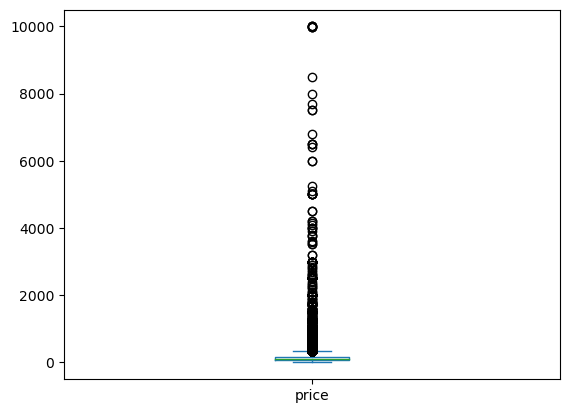

In [22]:
# Price values
df.price.plot.box()

In [23]:
df.minimum_nights.value_counts()

minimum_nights
1      12720
2      11696
3       7999
30      3760
4       3303
       ...  
43         1
114        1
250        1
400        1
182        1
Name: count, Length: 109, dtype: int64

<Axes: >

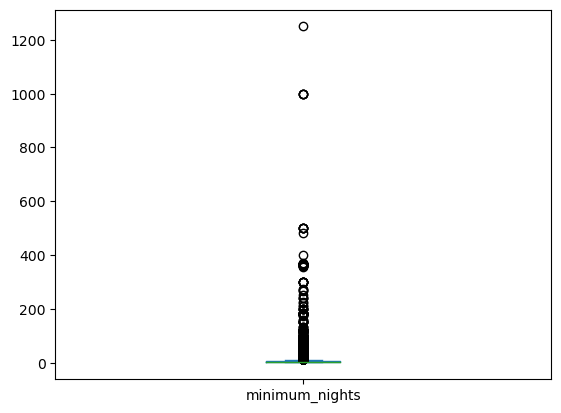

In [24]:
df.minimum_nights.plot.box()

<Axes: >

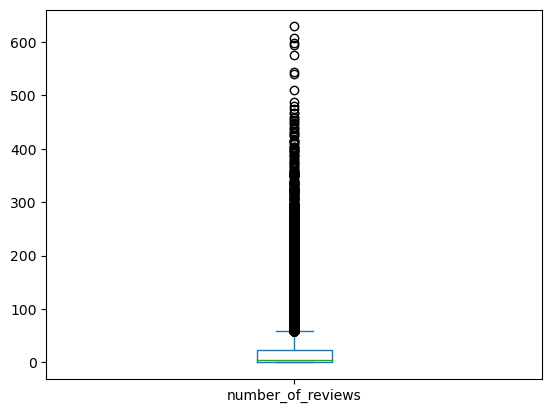

In [25]:
df.number_of_reviews.plot.box()

In [26]:
df.number_of_reviews.median()

5.0

In [27]:
df.number_of_reviews.mean()

23.274465691788528

<Axes: >

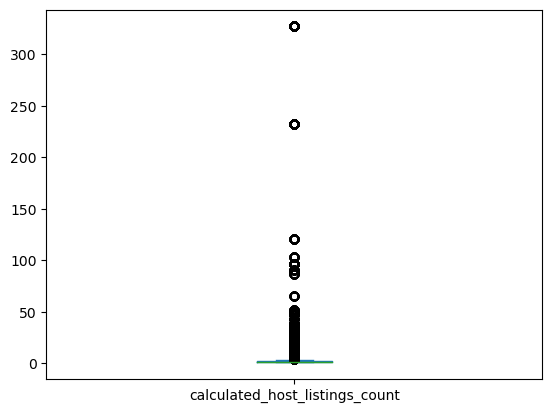

In [28]:
df.calculated_host_listings_count.plot.box()

In [29]:
df.calculated_host_listings_count.head(30)

0     1
1     1
2     6
3     6
4     6
5     6
6     6
7     6
8     2
9     2
10    1
11    2
12    2
13    1
14    1
15    1
16    1
17    2
18    2
19    2
20    2
21    2
22    2
23    1
24    1
25    1
26    1
27    1
28    1
29    1
Name: calculated_host_listings_count, dtype: int64